Classification models are evaluated using various metrics to assess their performance.

**Example Dataset:**
Suppose we have a dataset containing information about emails, with features like word count, presence of attachments, and whether the email is spam or not (binary classification).

| Word Count | Has Attachment | Spam |
|------------|----------------|------|
| 1000       | 0              | 1    |
| 500        | 1              | 0    |
| 800        | 0              | 1    |
| 1200       | 1              | 0    |
| 600        | 0              | 1    |

In [29]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(0)  # for reproducibility
num_samples = 1000

# Generate Word Count based on Has Attachment
has_attachments = np.random.randint(0, 2, num_samples)
word_counts = np.where(has_attachments == 1, 
                       np.random.randint(500, 2000, num_samples),  # Higher word count if there is an attachment
                       np.random.randint(50, 1500, num_samples))   # Lower word count if no attachment

# Generate binary target variable 'Spam' with stronger correlation
# Spam is more likely if the word count is high and there's no attachment
spam_prob = np.where((word_counts > 1000) & (has_attachments == 0), 
                     0.9,  # High probability of being spam
                     0.1)  # Low probability of being spam

spam_labels = np.random.binomial(1, spam_prob, num_samples)

# Create DataFrame
data = pd.DataFrame({'Word Count': word_counts, 'Has Attachment': has_attachments, 'Spam': spam_labels})

# Save DataFrame to CSV
data.to_csv('sample_data.csv', index=False)

print("Sample data saved to sample_data.csv")

Sample data saved to sample_data.csv


In [30]:
df = pd.read_csv('sample_data.csv')
df.head()

,Word Count,Has Attachment,Spam
0,100,0,1
1,784,1,0
2,672,1,0
3,197,0,0
4,1322,1,0


In [31]:
X = df[['Word Count','Has Attachment']]
y = df['Spam']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

In [33]:
# Assuming 'X' contains features and 'y' contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Predictions
y_pred = model.predict(X_test)

1. **Accuracy:**
   Accuracy measures the proportion of correctly classified instances out of all instances.

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


2. **Precision:**
   Precision measures the proportion of true positive predictions out of all positive predictions.

In [37]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.75


3. **Recall (Sensitivity):**
   Recall measures the proportion of true positive predictions out of all actual positive instances.

In [38]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.42857142857142855


4. **F1 Score:**
   F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.

In [39]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.5454545454545454


5. **ROC AUC Score:**
   ROC AUC (Receiver Operating Characteristic - Area Under the Curve) measures the area under the ROC curve, which plots the true positive rate (TPR) against the false positive rate (FPR). It indicates the model's ability to distinguish between classes.

In [40]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6952983725135624


In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [42]:
fpr, tpr, thresholds

(array([0.        , 0.03797468, 1.        ]),
 array([0.        , 0.42857143, 1.        ]),
 array([2, 1, 0]))

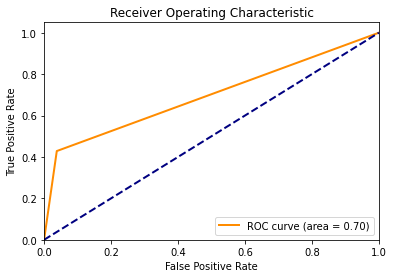

In [44]:
# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       158
           1       0.75      0.43      0.55        42

    accuracy                           0.85       200
   macro avg       0.81      0.70      0.73       200
weighted avg       0.84      0.85      0.83       200



In [40]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[152   6]
 [ 24  18]]


In [17]:
!pip install imbalanced-learn==0.7.0

  Obtaining dependency information for imbalanced-learn==0.7.0 from https://files.pythonhosted.org/packages/c8/81/8db4d87b03b998fda7c6f835d807c9ae4e3b141f978597b8d7f31600be15/imbalanced_learn-0.7.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl.metadata (11 kB)
Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [22]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       158
           1       0.51      0.55      0.53        42

    accuracy                           0.80       200
   macro avg       0.69      0.70      0.70       200
weighted avg       0.80      0.80      0.80       200



In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))`

Confusion Matrix:
[[136  22]
 [ 19  23]]
